In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [2]:
def plot_single_tuning_curve(cell_tuning,cell_ID,frequencies,intensities):
    frequencies = np.array(frequencies)
    intensities = np.array(intensities)
    fig = plt.figure(1)
    ax = fig.gca()
    fig.set_facecolor('white')

    im = plt.imshow(np.transpose(cell_tuning),cmap='winter',origin='lower')
    plt.colorbar(im)

    if len(frequencies)>5: # if we have a lot of frequencies
        # only show a label for every second frequency
        ax.set_xticks(range(0,len(frequencies),2))
        ax.set_xticklabels(frequencies[range(0,len(frequencies),2)])
    else:
        # otherwise show every frequency label
        ax.set_xticks(range(0,len(frequencies)))
        ax.set_xticklabels(frequencies[range(0,len(frequencies))])

    # show every intensity label
    ax.set_yticks(range(0,len(intensities)))
    ax.set_yticklabels(intensities)

    # label the axes
    ax.set_ylabel("Intensity (dB)")
    ax.set_xlabel("Frequency (Hz)")

    plt.title(cell_ID)
    plt.show()

In [3]:
def plot_tuning_traces(cell_traces,n_frequencies,n_intensities,y_limit):

    fig,axs = plt.subplots(n_intensities,n_frequencies,sharex='col',sharey='row',figsize=(14,5))

    for row,freq in zip(range(n_frequencies),cell_traces.keys()):
        for col,itsy in zip(range(n_intensities),reversed(list(cell_traces[freq].keys()))):
            for rep in cell_traces[freq][itsy]:
                axs[col,row].plot(cell_traces[freq][itsy][rep]) # plot every trial

            # miscellaneous formatting
            axs[col,row].set_xticks([])
            axs[col,row].set_yticks([])
            if row==0:
                axs[col,row].set_ylabel(itsy) # add the intensity to the far left edge
            if col==n_intensities-1:
                axs[col,row].set_xlabel(freq) # add the frequency at the bottom
            axs[col,row].axvline(x=4,color='k',linestyle='--')
            axs[col,row].set_ylim(bottom=0,top=y_limit)
            axs[col,row].autoscale(enable=True, axis='x', tight=True)

    fig.subplots_adjust(wspace=0,hspace=0)
    fig.set_facecolor('white')
    fig.text(0.5,0.01,"Frequency (Hz)",va='center',ha='center')
    fig.text(0.08,0.5,"Intensity (dB)",va='center',ha='center',rotation='vertical')
    plt.show()

In [5]:
with open('/media/vtarka/USB DISK/Lab/2P/Vid_236/cells.pkl', 'rb') as f:
        cell_dictionary = pickle.load(f)


In [6]:
print(cell_dictionary.keys())

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 120, 121, 122, 123, 124, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 160, 161, 162, 163, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 176, 178, 179, 180, 181, 182, 183, 184, 185, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 226, 227, 229, 230, 2

In [7]:
for cell in cell_dictionary:
    if cell_dictionary[cell]['active']:
        print(cell)

3
7
9
12
14
16
19
24
26
29
31
32
39
41
42
43
44
51
53
58
59
60
61
64
67
71
73
75
76
77
79
81
83
87
88
92
93
94
95
101
105
107
113
114
117
121
127
128
131
134
141
144
148
150
151
153
154
162
163
165
167
168
169
176
178
180
182
195
196
199
203
205
209
215
216
226
227
230
233
234
236
239
241
244
245
254
257
263
273
276
280
291
297
299
307
308
311
312
313
320
326
327
348
356
358
365
379
392
393
395
397
402
405
415
418
421
429
445
453
457
497
500
501
508
510
518
522
525
529
530
536
539
541
552
554
555
557
571
572
614
629
646
654
671
673
680
695
701
712
739
755
772
813
830
851
855
865
866
872
876
880
883
894
910
924
930
936
949
966
979
1004
1027
1035
1078
1100
1149
1160
1171
1228
1231
1232
1353
1515
1628
1660
1717
1759
1845
1848
2006
2052
2062
2152
2172
2184
2290
2928


True


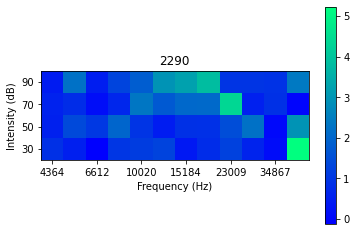

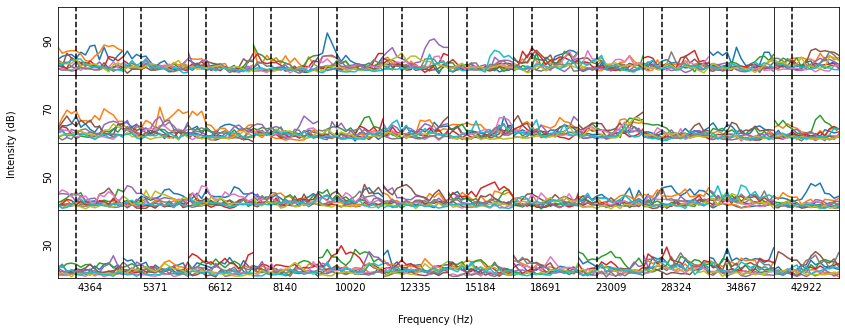

In [10]:

cell_ID = 2290
print(cell_dictionary[cell_ID]['active'])
frequencies = list(cell_dictionary[cell_ID]['traces'].keys())
intensities = list(cell_dictionary[cell_ID]['traces'][frequencies[0]].keys())
plot_single_tuning_curve(cell_dictionary[cell_ID]['tuning'],cell_ID,frequencies,intensities)
# get_cell_tuning_by_peak(cell_dictionary[cell_ID]['traces'],True)
plot_tuning_traces(cell_dictionary[cell_ID]['traces'],12,4,800)